In [1]:
# Content
#1. Basic Analysis of data
#2. Data Cleaning 
#3. All models on data
#4. Imbalance treatment Random -SMOTE
#5. Models after class imbalance treatment
#6. Cleaning of Test data
#7. POrediction on Test data
#8 Final Conversion of prediction in dataframe to csv format


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier 
dt  = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=25)
from sklearn.svm import SVC
svc=SVC()
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
from xgboost import XGBClassifier
xgb=XGBClassifier()
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [3]:
hr_train=pd.read_csv(r"C:\Users\Admin\Desktop\old laptop desktop\Desktop\Data Analytics-Edubridge\4.Advanced Python Libraries\Python Dataset\AVH HR analytic\train_Hr.csv")

In [4]:
hr_test=pd.read_csv(r"C:\Users\Admin\Desktop\old laptop desktop\Desktop\Data Analytics-Edubridge\4.Advanced Python Libraries\Python Dataset\AVH HR analytic\test_Hr.csv")

In [5]:
hr_train.shape,hr_test.shape

((54808, 14), (23490, 13))

In [6]:
#hr_train.isnull().sum()
hr_train.education=hr_train.education.fillna("Below Secondary")
hr_train.previous_year_rating=hr_train.previous_year_rating.fillna(2.0)

In [7]:
hr_train.dtypes
hr_train.department=le.fit_transform(hr_train.department)
hr_train.region=le.fit_transform(hr_train.region)
hr_train.education=le.fit_transform(hr_train.education)
hr_train.gender=le.fit_transform(hr_train.gender)
hr_train.recruitment_channel=le.fit_transform(hr_train.recruitment_channel)
hr_train.previous_year_rating=le.fit_transform(hr_train.previous_year_rating)

In [8]:
data=hr_train.corr()
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005187,-0.003423,0.002690,-0.001542,0.005960,-0.005121,0.000437,0.003631,0.001274,-0.002501,0.008420,-0.000586,0.001206
department,-0.005187,1.000000,-0.020592,0.054998,-0.030108,0.004732,0.014152,0.079162,-0.126715,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.003423,-0.020592,1.000000,-0.005032,0.019730,-0.000920,-0.004590,-0.088918,-0.009162,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.002690,0.054998,-0.005032,1.000000,-0.017824,-0.004660,-0.039286,0.316659,0.043366,0.217755,0.001265,-0.001391,0.013519,0.023250
gender,-0.001542,-0.030108,0.019730,-0.017824,1.000000,0.006567,0.084501,-0.016293,-0.025332,-0.019675,-0.037400,0.002381,-0.024494,-0.011109
recruitment_channel,0.005960,0.004732,-0.000920,-0.004660,0.006567,1.000000,-0.010405,-0.011400,0.005066,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,-0.005121,0.014152,-0.004590,-0.039286,0.084501,-0.010405,1.000000,-0.081278,-0.064882,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,0.079162,-0.088918,0.316659,-0.016293,-0.011400,-0.081278,1.000000,0.087579,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.003631,-0.126715,-0.009162,0.043366,-0.025332,0.005066,-0.064882,0.087579,1.000000,0.090687,0.325191,0.025562,0.069399,0.148203
length_of_service,0.001274,0.059060,-0.058939,0.217755,-0.019675,-0.002887,-0.057275,0.657111,0.090687,1.000000,-0.077693,-0.039927,-0.038122,-0.010670


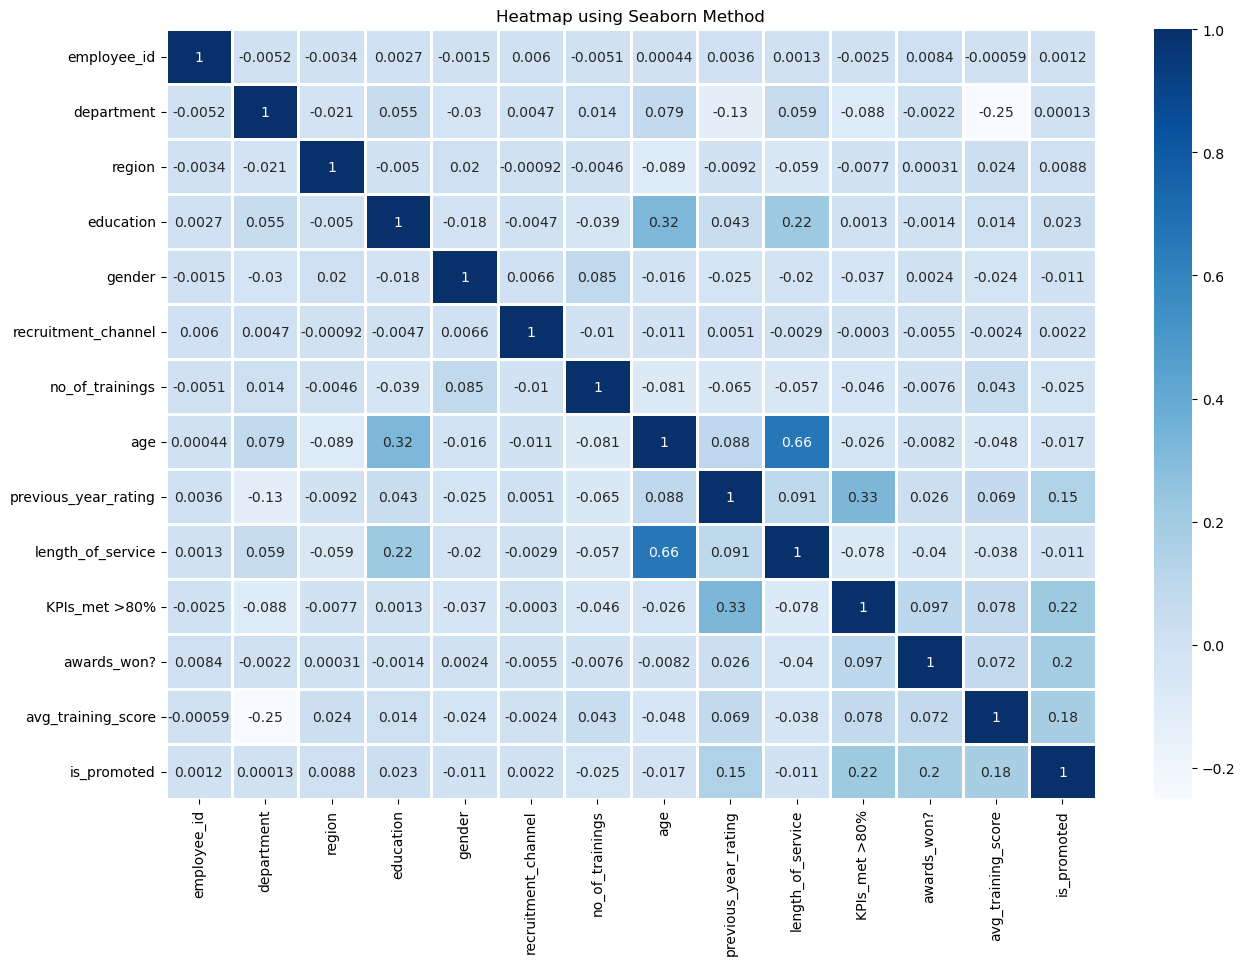

In [9]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

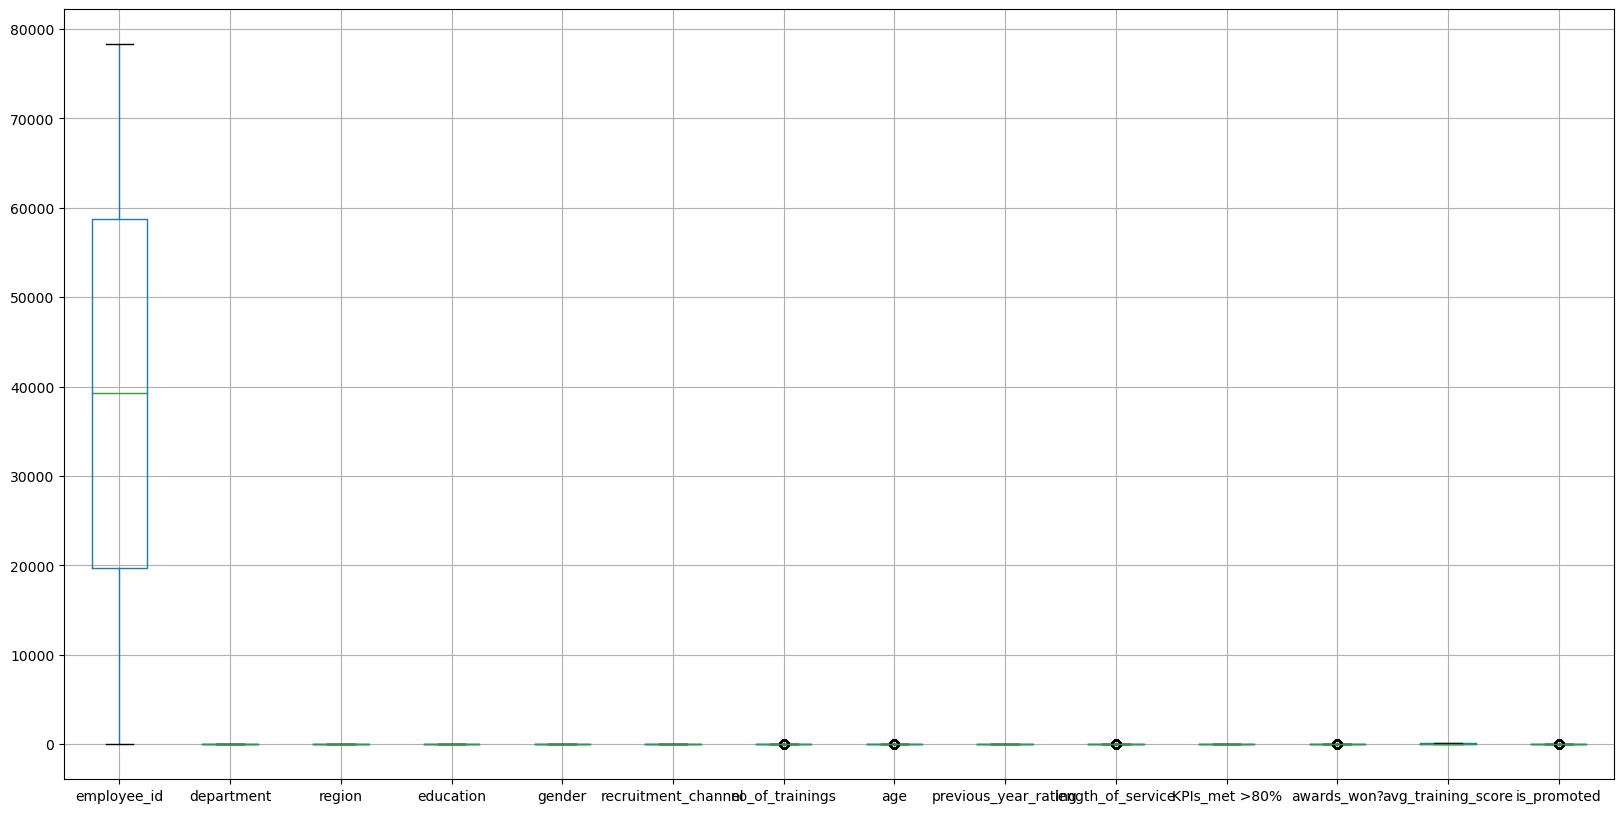

In [10]:
hr_train.boxplot(figsize=(20,10))
plt.show()

In [11]:
data_x=hr_train.iloc[:,1:-1]
data_y=hr_train.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
data_x_train,data_x_test,data_y_train,data_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)
data_x_train.shape,data_x_test.shape,data_y_train.shape,data_y_test.shape

((43846, 12), (10962, 12), (43846,), (10962,))

# Logistic regression

In [13]:
lm.fit(data_x_train,data_y_train)
p1=lm.predict(data_x_test)
m1=confusion_matrix(p1,data_y_test)
print(m1)
ac1=m1.diagonal().sum()/m1.sum()*100
print("The accuracy of Logistic Rgression Model is:",ac1)
print(classification_report(p1,data_y_test))

[[9953  841]
 [  87   81]]
The accuracy of Logistic Rgression Model is: 91.53439153439153
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     10794
           1       0.09      0.48      0.15       168

    accuracy                           0.92     10962
   macro avg       0.54      0.70      0.55     10962
weighted avg       0.98      0.92      0.94     10962



# Decision Tree

In [14]:
dt.fit(data_x_train,data_y_train)
p2=dt.predict(data_x_test)
m2=confusion_matrix(p2,data_y_test)
print(m2)
ac2=m2.diagonal().sum()/m2.sum()*100
print("The accuracy of Decision Tree Model is:",ac2)
print(classification_report(p2,data_y_test))

[[9396  508]
 [ 644  414]]
The accuracy of Decision Tree Model is: 89.49096880131363
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9904
           1       0.45      0.39      0.42      1058

    accuracy                           0.89     10962
   macro avg       0.69      0.67      0.68     10962
weighted avg       0.89      0.89      0.89     10962



# Random Forest

In [15]:
rf.fit(data_x_train,data_y_train)
p3=rf.predict(data_x_test)
m3=confusion_matrix(p3,data_y_test)
print(m3)
ac3=m3.diagonal().sum()/m3.sum()*100
print("The accuracy of Random Forest Model is:",ac3)
print(classification_report(p3,data_y_test))

[[9993  675]
 [  47  247]]
The accuracy of Random Forest Model is: 93.41361065498997
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10668
           1       0.27      0.84      0.41       294

    accuracy                           0.93     10962
   macro avg       0.63      0.89      0.69     10962
weighted avg       0.98      0.93      0.95     10962



# KNN

In [16]:
knn.fit(data_x_train,data_y_train)
p4=knn.predict(data_x_test)
m4=confusion_matrix(p4,data_y_test)
print(m4)
ac4=m4.diagonal().sum()/m4.sum()*100
print("The accuracy of KNN Model is:",ac4)
print(classification_report(p4,data_y_test))

[[10032   820]
 [    8   102]]
The accuracy of KNN Model is: 92.44663382594418
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10852
           1       0.11      0.93      0.20       110

    accuracy                           0.92     10962
   macro avg       0.55      0.93      0.58     10962
weighted avg       0.99      0.92      0.95     10962



# SVM

In [17]:
svc.fit(data_x_train,data_y_train)
p5=svc.predict(data_x_test)
m5=confusion_matrix(p5,data_y_test)
print(m5)
ac5=m5.diagonal().sum()/m5.sum()*100
print("The accuracy of SVM Model is:",ac5)
print(classification_report(p5,data_y_test))

[[10040   922]
 [    0     0]]
The accuracy of SVM Model is: 91.58912607188469
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     10962
           1       0.00      0.00      0.00         0

    accuracy                           0.92     10962
   macro avg       0.50      0.46      0.48     10962
weighted avg       1.00      0.92      0.96     10962



# NB

In [18]:
nb.fit(data_x_train,data_y_train)
p6=nb.predict(data_x_test)
m6=confusion_matrix(p6,data_y_test)
print(m6)
ac6=m6.diagonal().sum()/m6.sum()*100
print("The accuracy of Naive Bayes Model is:",ac6)
print(classification_report(p6,data_y_test))

[[9775  804]
 [ 265  118]]
The accuracy of Naive Bayes Model is: 90.24812990330233
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10579
           1       0.13      0.31      0.18       383

    accuracy                           0.90     10962
   macro avg       0.55      0.62      0.56     10962
weighted avg       0.94      0.90      0.92     10962



# XGBOOST

In [19]:
xgb.fit(data_x_train,data_y_train)
p7=xgb.predict(data_x_test)
m7=confusion_matrix(p7,data_y_test)
print(m7)
ac7=m7.diagonal().sum()/m7.sum()*100
print("The accuracy of XGBOOST Model is:",ac7)
print(classification_report(p7,data_y_test))

[[10006   611]
 [   34   311]]
The accuracy of XGBOOST Model is: 94.11603721948549
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10617
           1       0.34      0.90      0.49       345

    accuracy                           0.94     10962
   macro avg       0.67      0.92      0.73     10962
weighted avg       0.98      0.94      0.95     10962



In [56]:
roc=roc_auc_score(p7,data_y_test)
print(roc)
fpr,tpr,threshold=roc_curve(data_y_test,p7)

0.9219500309184204


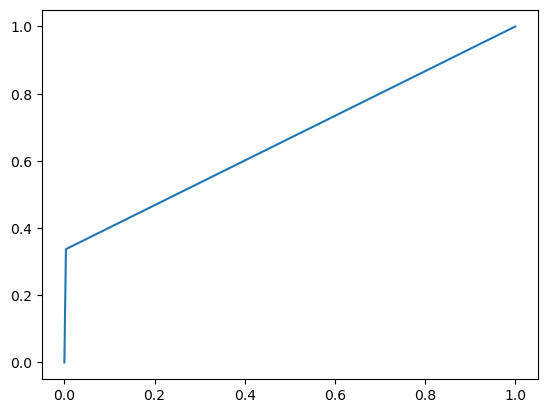

In [55]:
plt.plot(fpr,tpr)

# Class Imbalance Treatment

In [20]:
hr_x=hr_train.iloc[:,1:-1]
hr_y=hr_train.iloc[:,-1]
hr_x.shape,hr_y.shape

((54808, 12), (54808,))

In [21]:
hr_train["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [22]:
import imblearn

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [24]:
x_smote,y_smote=smote.fit_resample(hr_x,hr_y)

In [25]:
x_smote.shape,y_smote.shape

((100280, 12), (100280,))

In [26]:
y_smote.value_counts()

is_promoted
0    50140
1    50140
Name: count, dtype: int64

# Outlier Treatment

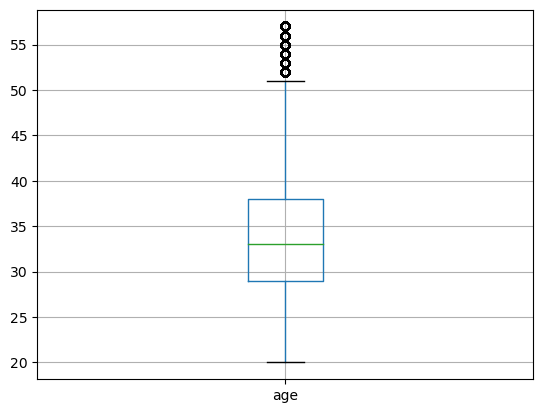

In [35]:
figure=x_smote.boxplot(column="age")

<Axes: >

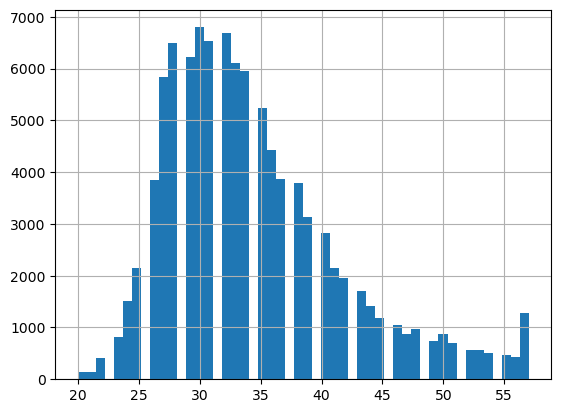

In [36]:
x_smote.age.hist(bins=50)

<Axes: xlabel='age', ylabel='Density'>

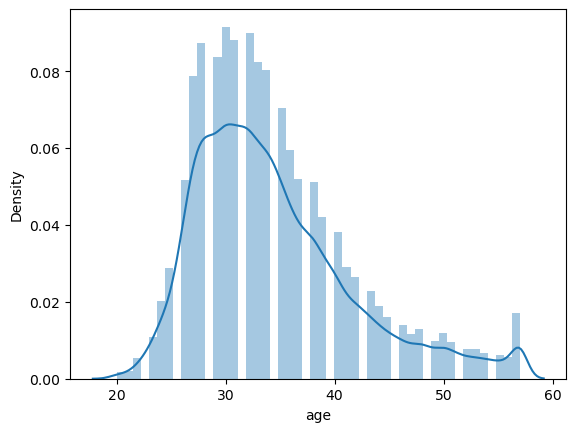

In [37]:
sns.distplot(x_smote["age"])

In [38]:
upper_boundary=hr_train["age"].mean()+3*hr_train["age"].std()
lower_boundary=hr_train["age"].mean()-3*hr_train["age"].std()
print(lower_boundary),print(upper_boundary),print(hr_train["age"].mean())

11.82340788203259
57.784423091547914
34.80391548679025


(None, None, None)

In [34]:
x_smote.loc[x_smote["age"]>57,"age"]=57

In [40]:
x_smote.skew()

department             -0.628301
region                  0.455628
education               0.967821
gender                 -0.460060
recruitment_channel     0.443755
no_of_trainings         4.205034
age                     1.025110
previous_year_rating   -0.225109
length_of_service       1.735788
KPIs_met >80%           0.176433
awards_won?             6.347149
avg_training_score      0.256731
dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=101)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((80224, 12), (20056, 12), (80224,), (20056,))

# Logistic Regression

In [45]:
lm.fit(x_tr,y_tr)
p11=lm.predict(x_te)
m11=confusion_matrix(p11,y_te)
print(m11)
ac11=m11.diagonal().sum()/m11.sum()*100
print("The accuracy of Balanced Logistic Rgression Model is:",ac11)
print(classification_report(p11,y_te))

[[6877 2720]
 [3189 7270]]
The accuracy of Balanced Logistic Rgression Model is: 70.5374950139609
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      9597
           1       0.73      0.70      0.71     10459

    accuracy                           0.71     20056
   macro avg       0.71      0.71      0.71     20056
weighted avg       0.71      0.71      0.71     20056



# Decision Tree

In [46]:
dt.fit(x_tr,y_tr)
p22=dt.predict(x_te)
m22=confusion_matrix(p22,y_te)
print(m22)
ac22=m22.diagonal().sum()/m22.sum()*100
print("The accuracy of Balanced Decision Tree Model is:",ac22)
print(classification_report(p22,y_te))

[[8795  672]
 [1271 9318]]
The accuracy of Balanced Decision Tree Model is: 90.3121260470682
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9467
           1       0.93      0.88      0.91     10589

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.90     20056
weighted avg       0.90      0.90      0.90     20056



# Random Forest

In [47]:
rf.fit(x_tr,y_tr)
p33=rf.predict(x_te)
m33=confusion_matrix(p33,y_te)
print(m33)
ac33=m33.diagonal().sum()/m33.sum()*100
print("The accuracy of Balanced Random Forest Model is:",ac33)
print(classification_report(p33,y_te))

[[9200  472]
 [ 866 9518]]
The accuracy of Balanced Random Forest Model is: 93.32867969684882
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9672
           1       0.95      0.92      0.93     10384

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [57]:
roc1=roc_auc_score(p33,y_te)
print(roc1)
fpr1,tpr1,threshold1=roc_curve(y_te,p33)

0.9339009018136958


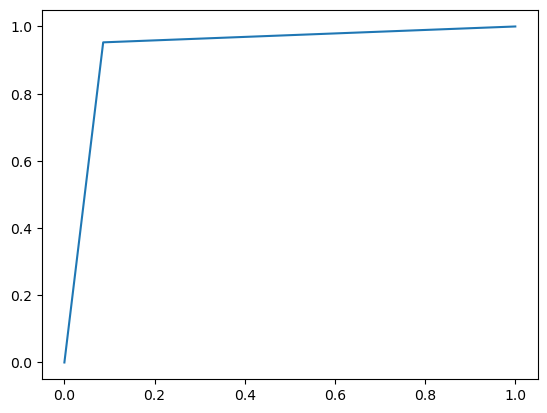

In [58]:
plt.plot(fpr1,tpr1)

In [60]:
precision,recall,threshold=precision_recall_curve(y_te,p33)

Text(0.5, 1.0, 'Precision-Recall')

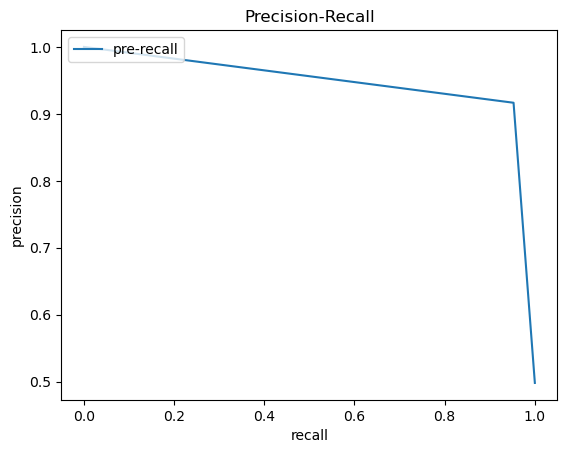

In [61]:
plt.plot(recall,precision, label="pre-recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# KNN

In [48]:
knn.fit(x_tr,y_tr)
p44=knn.predict(x_te)
m44=confusion_matrix(p44,y_te)
print(m44)
ac44=m44.diagonal().sum()/m44.sum()*100
print("The accuracy of Balanced KNN  Model is:",ac44)
print(classification_report(p44,y_te))

[[6996  464]
 [3070 9526]]
The accuracy of Balanced KNN  Model is: 82.37933785400877
              precision    recall  f1-score   support

           0       0.70      0.94      0.80      7460
           1       0.95      0.76      0.84     12596

    accuracy                           0.82     20056
   macro avg       0.82      0.85      0.82     20056
weighted avg       0.86      0.82      0.83     20056



# SVM

In [49]:
svc.fit(x_tr,y_tr)
p55=svc.predict(x_te)
m55=confusion_matrix(p55,y_te)
print(m55)
ac55=m55.diagonal().sum()/m55.sum()*100
print("The accuracy of Balanced SVM Model is:",ac55)
print(classification_report(p55,y_te))

[[6620 2085]
 [3446 7905]]
The accuracy of Balanced SVM Model is: 72.42221779018747
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      8705
           1       0.79      0.70      0.74     11351

    accuracy                           0.72     20056
   macro avg       0.72      0.73      0.72     20056
weighted avg       0.73      0.72      0.73     20056



# NB

In [50]:
nb.fit(x_tr,y_tr)
p66=nb.predict(x_te)
m66=confusion_matrix(p66,y_te)
print(m66)
ac66=m66.diagonal().sum()/m66.sum()*100
print("The accuracy of Balanced Naive Bayes Model is:",ac66)
print(classification_report(p66,y_te))

[[6198 3497]
 [3868 6493]]
The accuracy of Balanced Naive Bayes Model is: 63.27782209812525
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      9695
           1       0.65      0.63      0.64     10361

    accuracy                           0.63     20056
   macro avg       0.63      0.63      0.63     20056
weighted avg       0.63      0.63      0.63     20056



# XGBOOST

In [51]:
xgb.fit(x_tr,y_tr)
p77=xgb.predict(x_te)
m77=confusion_matrix(p77,y_te)
print(m77)
ac77=m77.diagonal().sum()/m77.sum()*100
print("The accuracy of Balanced XGBoost Model is:",ac77)
print(classification_report(p77,y_te))

[[8710  849]
 [1356 9141]]
The accuracy of Balanced XGBoost Model is: 89.00578380534503
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9559
           1       0.92      0.87      0.89     10497

    accuracy                           0.89     20056
   macro avg       0.89      0.89      0.89     20056
weighted avg       0.89      0.89      0.89     20056



# Prediction on Test data

In [67]:
hr_test.shape

(23490, 13)

In [63]:
hr_test.isnull().sum()
hr_test.education=hr_test.education.fillna("Below Secondary")
hr_test.previous_year_rating=hr_test.previous_year_rating.fillna(3)

In [68]:
hr_test.dtypes
hr_test.department=le.fit_transform(hr_test.department)
hr_test.region=le.fit_transform(hr_test.region)
hr_test.education=le.fit_transform(hr_test.education)
hr_test.gender=le.fit_transform(hr_test.gender)
hr_test.recruitment_channel=le.fit_transform(hr_test.recruitment_channel)

In [70]:
test_p=rf.predict(hr_test.iloc[:,1:])

In [72]:
df=pd.DataFrame(test_p,columns=["is_pramoted"])
df

,is_pramoted
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [73]:
df1=pd.DataFrame(hr_test.iloc[:,0])

In [75]:
df_final=pd.concat([df1,df],axis=1)
df_final

,employee_id,is_pramoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [77]:
df_final.to_csv(r"C:\Users\Admin\Desktop\old laptop desktop\Desktop\Data Analytics-Edubridge\4.Advanced Python Libraries\Python Dataset\AVH HR analytic\R1.csv",index=False)